<a href="https://colab.research.google.com/github/teerasitk/01205415/blob/main/PythonForFinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Python

In [1]:
!pip install yfinance # install yahoo finance on Colab
import yfinance as yf # load yahoo finance module
import pandas as pd  # load pandas module
import datetime as dt # date-time module
import matplotlib.pyplot as plt # for plotting
import numpy as np # for numerical function and arrays

# Load Gulf Data from 1-Jan-2020 to 31-Dec-2022

In [2]:
gulf = yf.download("GULF"+".BK", "2020-01-01", "2022-12-31")

[*********************100%%**********************]  1 of 1 completed


# print the header part of data to see cokumns

In [3]:
gulf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,32.825493,33.616470,32.825493,33.418724,32.143440,34950249
2020-01-03,33.517597,34.011955,33.220982,33.715340,32.428738,34247320
2020-01-06,33.418724,34.308575,33.319855,33.715340,32.428738,51358843
2020-01-07,33.913086,34.308575,33.715340,34.308575,32.999336,32859667
2020-01-08,34.011955,34.110828,33.122108,33.319855,32.048347,41558290


## There are Date, Open prices, High Prices, Low Prices, Close Prices, Adjusted Close Prices, and Volume

# Plot Close Prices over time

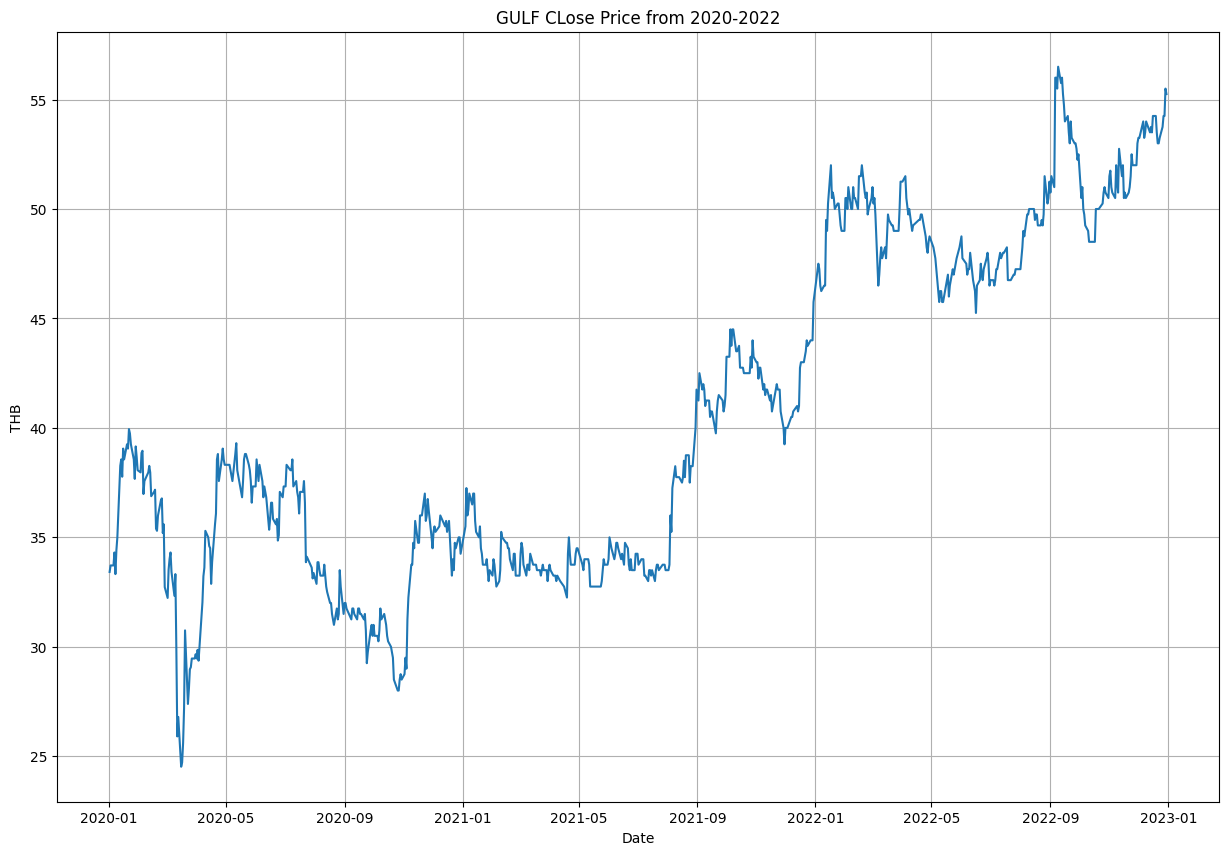

In [4]:
plt.figure(figsize=(15,10)) # set the image size to be 15x10
plt.plot(gulf.Close) # .Close for close price
plt.xlabel('Date') # label for x axis is date
plt.ylabel("THB") # label for y axis is THB
plt.title("GULF CLose Price from 2020-2022")
plt.grid() # add grid to the plot

# compute a simple return on each day

In [5]:
daily_return = gulf.Close.pct_change(1)
daily_return.head(10)

Date
2020-01-02         NaN
2020-01-03    0.008876
2020-01-06    0.000000
2020-01-07    0.017595
2020-01-08   -0.028818
2020-01-09    0.032641
2020-01-10    0.017241
2020-01-13    0.093220
2020-01-14    0.007752
2020-01-15   -0.020513
Name: Close, dtype: float64

## Remove Nan on the first day

In [6]:
daily_return = daily_return.dropna()
daily_return.head(10)

Date
2020-01-03    0.008876
2020-01-06    0.000000
2020-01-07    0.017595
2020-01-08   -0.028818
2020-01-09    0.032641
2020-01-10    0.017241
2020-01-13    0.093220
2020-01-14    0.007752
2020-01-15   -0.020513
2020-01-16    0.034031
Name: Close, dtype: float64

# Fill out the missing values for holidays and weekends

In [8]:
resampled_gulf = gulf.resample("1d").ffill()
# bfill for future value or ffill for past values
resampled_gulf.head(13)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,32.825493,33.616470,32.825493,33.418724,32.143440,34950249
2020-01-03,33.517597,34.011955,33.220982,33.715340,32.428738,34247320
2020-01-04,33.517597,34.011955,33.220982,33.715340,32.428738,34247320
2020-01-05,33.517597,34.011955,33.220982,33.715340,32.428738,34247320
2020-01-06,33.418724,34.308575,33.319855,33.715340,32.428738,51358843
2020-01-07,33.913086,34.308575,33.715340,34.308575,32.999336,32859667
2020-01-08,34.011955,34.110828,33.122108,33.319855,32.048347,41558290
2020-01-09,33.814213,34.605190,33.715340,34.407444,33.094429,65066469
2020-01-10,34.506317,35.000675,34.407444,35.000675,33.665024,36546758


In [9]:
# Specify the number of historical data range
gulf = yf.Ticker("GULF.BK") # yahoo calls stock ticker
hist = gulf.history(period="5y")
# y: year, mo:month, ytd: year to date, max: all"
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-11-27 00:00:00+07:00,14.336053,14.336053,14.148038,14.242045,20376857,0.0,0.0
2018-11-28 00:00:00+07:00,14.289049,14.383056,14.195043,14.336053,17534292,0.0,0.0
2018-11-29 00:00:00+07:00,14.383054,14.524065,14.242044,14.289047,38203446,0.0,0.0
2018-11-30 00:00:00+07:00,14.336053,14.383056,14.101035,14.242045,194168782,0.0,0.0
2018-12-03 00:00:00+07:00,14.383056,14.477063,14.336053,14.336053,19807939,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-21 00:00:00+07:00,47.000000,47.000000,46.250000,46.750000,5955900,0.0,0.0
2023-11-22 00:00:00+07:00,46.500000,46.500000,45.250000,45.750000,7896000,0.0,0.0
2023-11-23 00:00:00+07:00,45.750000,46.000000,45.500000,45.750000,2229200,0.0,0.0


# look only dividen and split actions

In [10]:
hist = gulf.history(period="max") # exact all information
gulf.actions # look at part actions

,Dividends,Stock Splits
Date,,
2018-05-02 00:00:00+07:00,0.079098,0.0
2019-05-02 00:00:00+07:00,0.237293,0.0
2020-03-05 00:00:00+07:00,0.257067,0.0
2020-04-16 00:00:00+07:00,0.000000,5.0
2021-03-05 00:00:00+07:00,0.380000,0.0
2022-03-04 00:00:00+07:00,0.440000,0.0
2023-03-01 00:00:00+07:00,0.600000,0.0


## Get each one separately.

In [11]:
print("Past dividends")
print(gulf.dividends)
print("past Splits")
print(gulf.splits)

Past dividends
Date
2018-05-02 00:00:00+07:00    0.079098
2019-05-02 00:00:00+07:00    0.237293
2020-03-05 00:00:00+07:00    0.257067
2021-03-05 00:00:00+07:00    0.380000
2022-03-04 00:00:00+07:00    0.440000
2023-03-01 00:00:00+07:00    0.600000
Name: Dividends, dtype: float64
past Splits
Date
2020-04-16 00:00:00+07:00    5.0
Name: Stock Splits, dtype: float64


# Obtain financial information regarding stocks

## Financial statement

In [12]:
gulf.financials

,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Tax Effect Of Unusual Items,-47981194.956,49171563.896,5239662.7788,220802042.8
Tax Rate For Calcs,0.087,0.0364,0.0171,0.2
Normalized EBITDA,28589022460.0,18152038314.0,12734587478.0,11163895764.0
Total Unusual Items,-551507988.0,1350867140.0,306413028.0,1104010214.0
Total Unusual Items Excluding Goodwill,-551507988.0,1350867140.0,306413028.0,1104010214.0
Net Income From Continuing Operation Net Minority Interest,11417560651.0,7670297904.0,4282113585.0,4886563655.0
Reconciled Depreciation,5062575848.0,4988945262.0,3431384043.0,2433921620.0
Reconciled Cost Of Revenue,74710986058.0,34388041471.0,23702238809.0,22791049577.0
EBITDA,28037514472.0,19502905454.0,13041000506.0,12267905978.0
EBIT,22974938624.0,14513960192.0,9609616463.0,9833984358.0


## Balance Sheet

In [13]:
gulf.balance_sheet

,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Ordinary Shares Number,11733150000.0,11733150000.0,11733150000.0,10788194098.0
Share Issued,11733150000.0,11733150000.0,11733150000.0,10788194098.0
Net Debt,209216427412.0,202974399700.0,124961972668.0,62770980992.0
Total Debt,250564838344.0,223564106897.0,141718377706.0,77160776251.0
Tangible Book Value,106913964697.0,77632029692.0,46673225778.0,37314600911.0
...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,42327410233.0,22160563887.0,16219836059.0,14402169674.0
Other Short Term Investments,3133755900.0,2313723064.0,317595680.0,12374415.0
Cash And Cash Equivalents,39193654333.0,19846840823.0,15902240379.0,14389795259.0
Cash Equivalents,21145000000.0,1260000000.0,254000000.0,2587811257.0


## Cashflow statement

In [14]:
gulf.cashflow

,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Free Cash Flow,-6281436919.0,-8181147201.0,-8032354623.0,-5547901428.0
Repayment Of Debt,-53372387094.0,-86133688208.0,-71082577997.0,-14026772938.0
Issuance Of Debt,97277366484.0,164059837460.0,109726528275.0,21629213205.0
Issuance Of Capital Stock,NaN,1864239652.0,32490310306.0,1153451115.0
Capital Expenditure,-17559070999.0,-22195862013.0,-18611132623.0,-13596338295.0
...,...,...,...,...
Gain Loss On Investment Securities,-75760383.0,-2425651390.0,-440174152.0,-100867699.0
Net Foreign Currency Exchange Gain Loss,-366015586.0,1674811055.0,773064263.0,-1009888503.0
Gain Loss On Sale Of PPE,-5369834.0,17177429.0,1454935.0,57096.0
Gain Loss On Sale Of Business,-570083244.0,NaN,NaN,0.0
